In [12]:
x = {} 
if x:
    print('True')
else:
    print('False')

False


# PLOTS

In [8]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

In [13]:
# Lists to store the extracted values
targets = []
outputs = []
losses = []

# Splitting the content by lines and iterating through them
with open('../checkpoints/0809/txts/0809-sh_em_1qm_v2_validation_1.txt', 'r') as file:
    for line in file.read().split('\n'):
        if "target:" in line:
            parts = line.split(',')
            targets.append(float(parts[1].split(':')[1].strip()))
            outputs.append(float(parts[2].split(':')[1].strip()))
            losses.append(float(parts[3].split(':')[1].strip()))

y_test, y_pred, losses = np.array(targets)*1000, np.array(outputs)*1000, losses

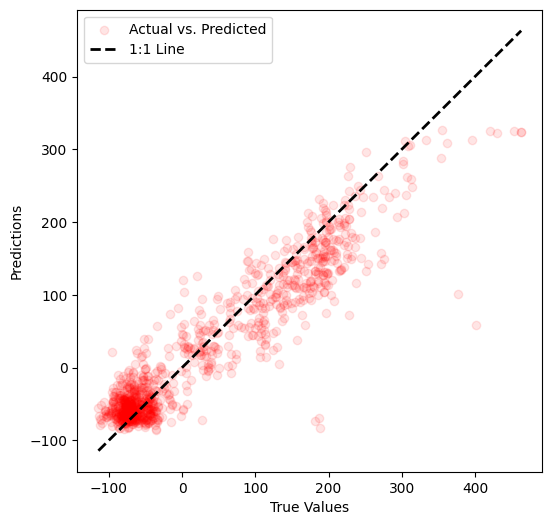

In [16]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='r', label='Actual vs. Predicted', alpha=0.1)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--', lw=2, label='1:1 Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# FUNCTIONS

In [3]:
import numpy as np

In [18]:
def should_stop_training(losses, lookback_epochs=5, threshold=0.001):
    """
    Determines if training should stop based on the slope of the linear regression line fitted to the last `lookback_epochs` losses.
    
    Parameters:
    - losses (list): List of loss values, where the most recent loss is the last element.
    - lookback_epochs (int): Number of recent epochs to consider.
    - threshold (float): Slope threshold to determine if training should stop.
    
    Returns:
    - bool: True if training should stop, False otherwise.
    """
    
    # If there aren't enough epochs yet, continue training
    if len(losses) < lookback_epochs:
        return False
    
    # Extract the last `lookback_epochs` losses
    recent_losses = np.array(losses[-lookback_epochs:])
    epochs = np.array(range(1, lookback_epochs + 1))
    
    # Calculate the slope of the linear regression line using numpy's polyfit
    slope, _ = np.polyfit(epochs, recent_losses, 1)
    print(-slope)

    # If the absolute slope is below the threshold, stop the training
    return -slope < threshold

0.010000000000000005
False


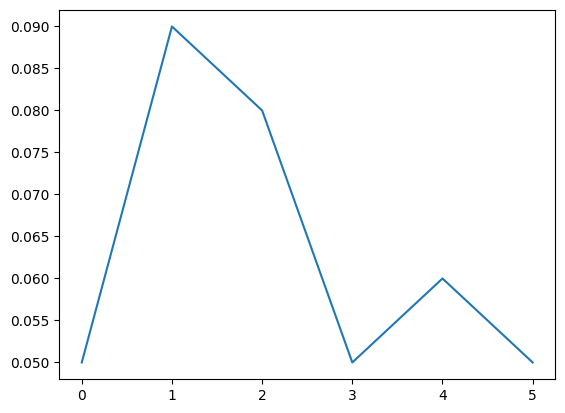

In [19]:
losses = [0.05, 0.09, 0.08, 0.05, 0.06, 0.05]

print(should_stop_training(losses))

#plot losses
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()


In [21]:
import pickle

#object
a = {'hello': 'world'}

#save
with open('filename.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

#load
with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(a == b)
print(type(b))

True
<class 'dict'>


In [19]:
import numpy as np
input_dim = 10
block_n_layers = 3
n_neurons = []
layers_dim = np.linspace(input_dim, input_dim**2, block_n_layers).astype(int)
for n in zip(layers_dim[:-1], layers_dim[1:]): n_neurons.append(n)
layers_dim = np.linspace(input_dim**2, 1, block_n_layers).astype(int)
for n in zip(layers_dim[:-1], layers_dim[1:]): n_neurons.append(n)

print(n_neurons)

[(10, 55), (55, 100), (100, 50), (50, 1)]


In [3]:
import uuid
print(uuid.uuid4())

3bb01b85-a6fa-4374-ac63-15cb3f9925b4


In [8]:
str_id = str(uuid.uuid4())
str_id

'be6c74ef-eb9e-4c8f-ba74-be61a323f7a0'

In [25]:
import csv

# Sample data
data = [
    ["uuid", "name", "description"],
    ["1a2b3c4d", "Object 1", "Description for Object 1"],
    ["5e6f7g8h", "Object 2", "Description for Object 2"],
]

# Save data to a CSV file
with open("objects.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data)

In [26]:
new_data = [
    {"uuid": "9i8u7y6t", "name": "Object 3",   "new_col": "New Column 1", "description": "Description, for Object 3",},
]

with open('objects.csv', 'a', newline='') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=new_data[0].keys())
    csv_writer.writerows(new_data)


In [27]:
with open('objects.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    # Loop through rows and display data
    for row in csv_reader:
        print(row)

{'uuid': '1a2b3c4d', 'name': 'Object 1', 'description': 'Description for Object 1'}
{'uuid': '5e6f7g8h', 'name': 'Object 2', 'description': 'Description for Object 2'}
{'uuid': '9i8u7y6t', 'name': 'Object 3', 'description': 'New Column 1', None: ['Description, for Object 3']}


In [29]:
import datetime
datetime.datetime.now().strftime("%m%d")

'0908'

In [32]:
import zipfile, os

def zip_folder(folder_path, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname)

# Example usage
folder_to_zip = './peptide-QML/checkpoints/'
zip_filename = 'output.zip'
zip_folder(folder_to_zip, zip_filename)

In [33]:
x = [1,2,3,4,5,6,7,8,9,10]
x.append(11)

In [35]:
x.append([12,13,14,15,16,17,18,19,20])

In [41]:
x = dict(iter({
    'a': 1,
    'b': 2,
}.items()))
x

{'a': 1, 'b': 2}

In [75]:
import uuid
from itertools import product

class sweep:
    def __init__(self, name_notebook, **params):
        self.name_notebook = name_notebook
        self.uuid = uuid.uuid4()
        self.params = params        
        self.points = list(product(*params.values()))
        self.n_points = len(self.points)

        self.added_info = {k: {} for k in range(0, self.n_points)}

    def __iter__(self):
        for index, point in enumerate(self.points):
            yield {'idx': index, **dict(zip(self.params.keys(), point))}

    def get_iter_with_info(self):
        for index, point in enumerate(self.points):
            yield {'idx': index, **dict(zip(self.params.keys(), point)), **self.added_info[index]}

    def add_info(self, idx, **info):
        self.added_info[idx].update(info)

    def get_info(self, idx):
        return self.added_info[idx]
    
    def save(self):
        with open(f'{self.name_notebook}.pickle', 'wb') as handle:
            pickle.dump(self, handle, )

# Test
s = sweep('test_notebook', a=[1,2,3], b=[4,2,1])
s.add_info(1, loss=0.1, acc=0.9)
for x in s.get_iter_with_info():
    print(x)

{'idx': 0, 'a': 1, 'b': 4}
{'idx': 1, 'a': 1, 'b': 2, 'loss': 0.1, 'acc': 0.9}
{'idx': 2, 'a': 1, 'b': 1}
{'idx': 3, 'a': 2, 'b': 4}
{'idx': 4, 'a': 2, 'b': 2}
{'idx': 5, 'a': 2, 'b': 1}
{'idx': 6, 'a': 3, 'b': 4}
{'idx': 7, 'a': 3, 'b': 2}
{'idx': 8, 'a': 3, 'b': 1}


In [71]:
x = {'a': 1, 'b': 2}
x.update({'b': 3})

In [72]:
x

{'a': 1, 'b': 3}

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define a toy dataset (randomly generated)
num_samples = 1000
seq_length = 20
vocab_size = 1000
embedding_dim = 64
hidden_dim = 128
output_dim = 1  # Number of classes for classification

class MyEmbeddingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(MyEmbeddingModel, self).__init__()
        
        # Define the embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # Define additional layers (e.g., LSTM, fully connected layers, etc.)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # Forward pass through the embedding layer
        embedded = self.embedding(x)
        
        # Forward pass through the LSTM layer
        lstm_out, _ = self.lstm(embedded)
        
        # Apply the fully connected layer to get the final output
        output = self.fc(lstm_out[:, -1, :])  # Use the last time step's output
        
        return output

In [21]:
X.shape

torch.Size([1000, 20])

In [24]:
from torch.utils.data import DataLoader, TensorDataset

# Generate random input data
X = torch.randint(0, vocab_size, (num_samples, seq_length)).int()
y = torch.randint(0, 2, (num_samples,)).view(-1, 1).float()

# Create a DataLoader
batch_size = 32
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create an instance of MyEmbeddingModel
model = MyEmbeddingModel(vocab_size, embedding_dim, hidden_dim, output_dim)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_x)
        
        # Compute the loss
        loss = criterion(outputs, batch_y)
        
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print loss for monitoring training progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training complete!')

Epoch [1/10], Loss: 0.2981
Epoch [2/10], Loss: 0.2990
Epoch [3/10], Loss: 0.2245
Epoch [4/10], Loss: 0.1213
Epoch [5/10], Loss: 0.1454
Epoch [6/10], Loss: 0.0710
Epoch [7/10], Loss: 0.0348
Epoch [8/10], Loss: 0.0201
Epoch [9/10], Loss: 0.0229
Epoch [10/10], Loss: 0.0090
Training complete!
